<a href="https://colab.research.google.com/github/soyudea/Optimizacion/blob/main/Newton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

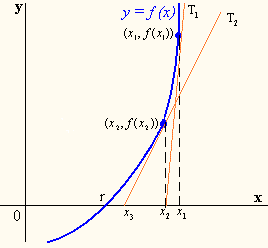

**Carga de librerías**

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols
from sympy import diff
from sympy import sin
from sympy import cos
from scipy.misc import derivative

**Ingreso valor inicial**

In [ ]:
x0  = float(input("Ingrese la frontera inferior del intervalo x0 "))
err = float(input("Ingrese valor del error aceptable "))

Ingrese la frontera inferior del intervalo x0 2.5
Ingrese valor del error aceptable 0.001


**Grafica de f(x)  = 2*sen(x= - x^2/10**


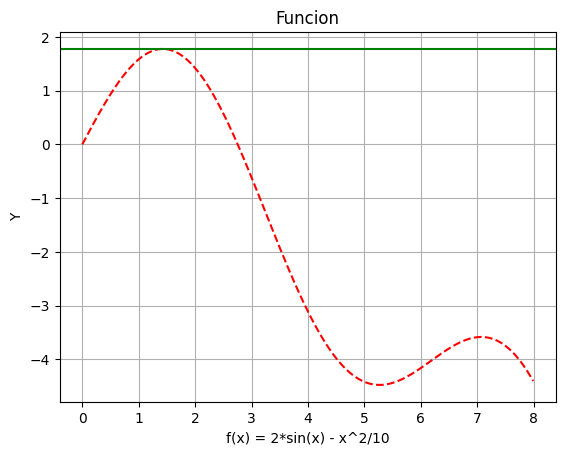

In [148]:
xl = 0
xu = 8

def graf_f():
  X = list(np.arange(xl, xu, 0.01))
  Y=[(2*math.sin(x) -(x**2)/10) for x in X]

  plt.title("Funcion")
  plt.xlabel("f(x) = 2*sin(x) - x^2/10")
  plt.ylabel("Y")
  plt.plot(X,Y, "r--")
  plt.axhline( 1.77572565314742, xmin=0, color="g")
  plt.grid()
  plt.show()

graf_f()

**Clase Newton**

In [ ]:
x = symbols('x')
y = 2*sin(x) - x**2/10
fprime = diff(y,x)
fsecond = fprime.diff(x)
print(fprime)
print(fsecond)

-x/5 + 2*cos(x)
-2*sin(x) - 1/5


In [150]:
class Newton:
  def __init__(self, x0, err):
    self.__xi = x0
    self.__xlast = 0
    self.__f_last = 0
    self.__err = err
    self.__fd1 = 0
    self.__fd2 = 0

  def __derive(self, x):
    fd1 = 2*math.cos(x) - (x)/5
    fd2 = -2*math.sin(x) - 1/5
    self.__fd1 = fd1
    self.__fd2 = fd2

  def __cal_x_mas(self, x):
    self.__derive(x)
    x_fut = 0
    if self.__fd2 != 0:
       x_fut = x - self.__fd1/self.__fd2
    return x_fut

  def __cal_f(self, x):
      f = 2*sin(x) - x**2/10
      return f

  def __printf(self,i, x,f, fd1,fd2, dif_x):
      print("_______________________________________Resultados_________________________________________")
      print("i = ",i)
      print("x = ",x)
      print("f(x) = ",f)
      print("f'(x) = ", fd1)
      print("f''(x) = ", fd2)
      print("dif_x = ", dif_x)

  def Max(self):
      dif_x = 1
      xlast = 0
      xfut =0
      i = 0
      while  dif_x != 0:
         xfut = self.__cal_x_mas(self.__xi)
         self.__f_last = self.__cal_f(self.__xi)
         self.__printf(i,self.__xi, self.__f_last, self.__fd1, self.__fd2, dif_x)

         self.__xlast = self.__xi
         self.__xi = xfut
         dif_x = self.__xi - self.__xlast
         i += 1

      return self.__f_last



In [152]:
def main():
  obj = Newton(x0, err)
  print("Maximo de f(x) = ",obj.Max())
if __name__=='__main__':
   main()

_______________________________________Resultados_________________________________________
i =  0
x =  2.5
f(x) =  0.571944288207913
f'(x) =  -2.102287231093867
f''(x) =  -1.396944288207913
dif_x =  1
_______________________________________Resultados_________________________________________
i =  1
x =  0.9950815513259932
f(x) =  1.57858800724688
f'(x) =  0.8898526612955174
f''(x) =  -1.8776067366258125
dif_x =  -1.5049184486740068
_______________________________________Resultados_________________________________________
i =  2
x =  1.4690107527596457
f(x) =  1.77384937931422
f'(x) =  -0.09058233023771725
f''(x) =  -2.1896486384865694
dif_x =  0.47392920143365247
_______________________________________Resultados_________________________________________
i =  3
x =  1.4276423210187772
f(x) =  1.77572564421365
f'(x) =  -0.0001973394672618034
f''(x) =  -2.179541903890041
dif_x =  -0.04136843174086846
_______________________________________Resultados_________________________________________
